# Mounting Google Drive and Setting up dataset from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

# changing the working directory
%cd /content/gdrive/My Drive/Dataset

Mounted at /content/gdrive
/content/gdrive/My Drive/Dataset


# Stain Normalisation

### Installing and importing StainTools, SPAMS and Image (from PIL)

In [ ]:
!pip install staintools
!pip install spams

import staintools
from PIL import Image

  Created wheel for staintools: filename=staintools-2.1.2-cp37-none-any.whl size=14072 sha256=dfa6d3cf2acdb21a9f913e8fbdd2b1ed821ce05a9eb5f6bc94d57bfa623b585c
  Stored in directory: /root/.cache/pip/wheels/76/01/f8/81c62c374358f5baf8b278b5c57ab13534eb8f811bff1ddcb8
Successfully built staintools
     |████████████████████████████████| 1.6MB 7.6MB/s 
  Created wheel for spams: filename=spams-2.6.2.5-cp37-cp37m-linux_x86_64.whl size=4516292 sha256=09a7bbf11893171b725444af5475ad0c752b393c044c05ee01f382ceb5d15430
  Stored in directory: /root/.cache/pip/wheels/ba/6f/08/d9d013b9e3ac5ce8f10e67573f38a366c907f99299d5d7711a
Successfully built spams


### Initialization

In [ ]:
dataset_dir = "/content/gdrive/MyDrive/Dataset/"
normalized_dir = "/content/gdrive/MyDrive/Normalized/"
train_0 = "train/0/"
train_1 = "train/1/"
test_0 = "test/0/"
test_1 = "test/1/"

target = staintools.read_image('/content/gdrive/MyDrive/Dataset/train/0/10300_idx5_x251_y1251_class0.png')
normalizer = staintools.StainNormalizer(method = 'vahadane')
normalizer.fit(target)

### Function for Normalization

In [ ]:
def stain_normalisation(source, destination):
  global normalizer
  image_names = os.listdir(source[:-1])

  for i in image_names:
    try:
      to_transform = staintools.read_image(source + i)
      transformed = normalizer.transform(to_transform)
      im = Image.fromarray(transformed)
      im.save(destination + i)
    except:
      pass

### Passing different folder names for Stain Normalization

In [ ]:
source = dataset_dir + train_0
destination = normalized_dir + train_0
stain_normalisation(source, destination)

source = dataset_dir + train_1
destination = normalized_dir + train_1
stain_normalisation(source, destination)

source = dataset_dir + test_0
destination = normalized_dir + test_0
stain_normalisation(source, destination)

source = dataset_dir + test_1
destination = normalized_dir + test_1
stain_normalisation(source, destination)

### Visualization

In [ ]:
import matplotlib.pyplot as plt

image_list = [train_0 + "10300_idx5_x251_y1201_class0.png", train_1 + "10253_idx5_x501_y401_class1.png", 
              test_0 + "12875_idx5_x601_y301_class0.png", test_1 + "12822_idx5_x351_y151_class1.png"]
unnormalized = []
normalized = []

for i in image_list:
  temp = staintools.read_image(dataset_dir + i)
  unnormalized.append(temp)
  temp = staintools.read_image(normalized_dir + i)
  normalized.append(temp)

x----------Target for Normalization----------x



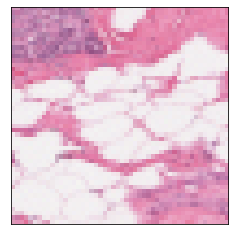

In [ ]:
print("x----------Target for Normalization----------x\n")

plt.figure()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(target)

x------------Before normalization------------x



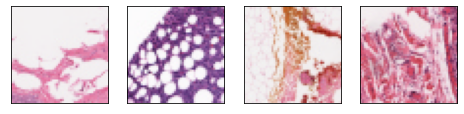

In [ ]:
print("x------------Before normalization------------x\n")

plt.figure(figsize = (8, 8))
for i in range(4):
  plt.subplot(1, 4, i + 1)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  plt.imshow(unnormalized[i])

x------------After normalization------------x



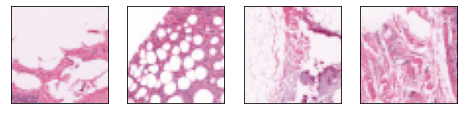

In [ ]:
print("x------------After normalization------------x\n")

plt.figure(figsize = (8, 8))
for i in range(4):
  plt.subplot(1, 4, i + 1)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  plt.imshow(normalized[i])

# Dataset Details

In [ ]:
a = len(os.listdir(normalized_dir + train_0))
b = len(os.listdir(normalized_dir + test_0))
c = len(os.listdir(normalized_dir + train_1))
d = len(os.listdir(normalized_dir + test_1))
print("X ---- NORMALIZED DATASET DETAILS ---- X")
print("CLASS 0 : Training = ", a, " and Testing = ", b, " ---> Total = ", (a + b))
print("CLASS 1 : Training = ", c, " and Testing = ", d, " ---> Total = ", (c + d))
print("Grand Total = ", (a + b + c + d))

X ---- NORMALIZED DATASET DETAILS ---- X
CLASS 0 : Training =  19239  and Testing =  4809  ---> Total =  24048
CLASS 1 : Training =  19239  and Testing =  4809  ---> Total =  24048
Grand Total =  48096
